In [ ]:
import numpy as np 
import math
import csv
from copy import deepcopy
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
from tensorflow import keras
from tensorflow.keras import layers

Reading data for training 

In [ ]:
def read_data():
    active_landmarks = []
    with open('Active_Landmarks.csv', 'r') as file:  #change to any path name where landmark data exists
        reader = csv.reader(file)
        for row in reader:
            active_landmarks.append(row)
    file.close()
    for landmark in active_landmarks:
        landmark[1] = float(landmark[1])  #converting the rssi and timestamp to float values
        landmark[2] = float(landmark[2])

    landmarks = []
    with open('Landmarks.csv', 'r') as file:  #change to any path name where landmark data exists
        reader = csv.reader(file)
        for row in reader:
            landmarks.append(row)
    file.close()
    for landmark in landmarks:
        landmark[1] = float(landmark[1])  #converting the rssi and timestamp to float values
        landmark[2] = float(landmark[2])
    products = []


    with open('Products.csv', 'r') as file1: #change to any path name where product data exists
        reader = csv.reader(file1)
        for row in reader:
            products.append(row) 
    for product in products:
        product[2] = float(product[2])  #converting the rssi and timestamp to float values
        product[3] = float(product[3])
        product[2] = float("{:.0f}".format(product[2]))   #removing the unnecessary precision in floating point values 
        product[3] = float("{:.0f}".format(product[3]))
    
    return [products, landmarks, active_landmarks]

Organising Data into a Dictionary


In [ ]:
data = read_data()
products = data[0]  #reading data values into lists
landmarks = data[1]
active_landmarks = data[2]

Getting Top ten Timestamps

In [ ]:
unique_list = list(set(tuple(inner_list) for inner_list in active_landmarks)) #similar steps for the products data

unique_list_of_lists = [list(inner_tuple) for inner_tuple in unique_list]

active_landmarks = unique_list_of_lists

In [ ]:
unique_list = list(set(tuple(inner_list) for inner_list in landmarks))  #removing the duplicatees by converting to tuple

unique_list_of_lists = [list(inner_tuple) for inner_tuple in unique_list] #re-converting to lists and renaming

landmarks = unique_list_of_lists

In [ ]:
unique_list = list(set(tuple(inner_list) for inner_list in products)) #similar steps for the products data

unique_list_of_lists = [list(inner_tuple) for inner_tuple in unique_list]

products = unique_list_of_lists

In [ ]:
product_dict = {}   #initializing a product dictionary
for i in products:
  product_dict[i[0]] = []
for i in products:
  product_dict[i[0]].append(i)  #the key of the dictionary is the unique item no of the products

for key in product_dict.keys():
  product_dict[key].sort(key=lambda x: -x[2]) #sorting the products according to the rssi values in decreasing order

for key in product_dict.keys():
  product_dict[key] = product_dict[key][:int(len(product_dict[key])/10)]  #selecting the top 10% of the readings 


In [ ]:
active_landmark_dict = {}        #initializing a landmark dictionary
active_landmarks.sort(key = lambda x: x[2]) #sorting w.r.t timestamp
for landmark in active_landmarks:
  active_landmark_dict[str(landmark[2])] = []  #the key of the dictionary is the timestamp of the readings

for landmark in active_landmarks:
  active_landmark_dict[str(landmark[2])].append(landmark)  #appending the value of the 32 landmarks for each time stamp

for key in active_landmark_dict.keys():
  labels = {}
  if len(active_landmark_dict[key])>=32:
    for i in active_landmark_dict[key]:
      labels[i[0]] = -91
    for i in active_landmark_dict[key]:
      if i[1]>labels[i[0]]:
        labels[i[0]] = i[1]
    active_landmark_dict[key] = [[k, labels[k], key] for k in labels.keys()] #removing the re-occurance of the reading for a particular timestamp
    active_landmark_dict[key].sort(key = lambda x: x[0])

print(active_landmark_dict.keys())

dict_keys(['86.758', '89.82900000000001', '93.265', '96.733', '100.066', '103.05799999999999', '106.39500000000001', '109.512', '112.797', '116.201', '119.49600000000001', '122.878', '129.771', '132.906', '136.05999999999997', '146.45', '149.898', '153.13', '163.20299999999997', '166.30700000000002', '169.44899999999998', '179.855', '183.233', '186.411', '196.398', '199.663', '202.814', '213.307', '216.881', '220.084', '229.987', '233.348', '236.617', '246.57299999999998', '250.01600000000002', '253.08799999999997', '269.245', '272.55600000000004', '275.72400000000005', '280.59099999999995', '283.908', '287.18', '297.036', '300.467', '303.524', '313.939', '317.153', '320.326', '330.618', '333.89799999999997', '336.914', '347.113', '350.31800000000004', '353.562', '363.346', '366.51800000000003', '369.483', '380.53999999999996', '383.864', '386.889', '397.194', '400.488', '403.457', '414.205', '418.106', '421.726', '430.576', '433.612', '436.724', '447.375', '451.364', '454.5', '463.945

In [ ]:
landmark_dict = {}        #initializing a landmark dictionary
landmarks.sort(key = lambda x: x[2]) #sorting w.r.t timestamp
for landmark in landmarks:
  landmark_dict[str(landmark[2])] = []  #the key of the dictionary is the timestamp of the readings

for landmark in landmarks:
  landmark_dict[str(landmark[2])].append(landmark)  #appending the value of the 32 landmarks for each time stamp

for key in landmark_dict.keys():
  labels = {}
  if len(landmark_dict[key])>=32:
    for i in landmark_dict[key]:
      labels[i[0]] = -91
    for i in landmark_dict[key]:
      if i[1]>labels[i[0]]:
        labels[i[0]] = i[1]
    landmark_dict[key] = [[k, labels[k], key] for k in labels.keys()] #removing the re-occurance of the reading for a particular timestamp
    landmark_dict[key].sort(key = lambda x: x[0])

print(landmark_dict.keys())

dict_keys(['86.758', '89.82900000000001', '93.265', '96.733', '100.066', '103.05799999999999', '106.39500000000001', '109.512', '112.797', '116.201', '119.49600000000001', '122.878', '129.771', '132.906', '136.05999999999997', '146.45', '149.898', '153.13', '163.20299999999997', '166.30700000000002', '169.44899999999998', '179.855', '183.233', '186.411', '196.398', '199.663', '202.814', '213.307', '216.881', '220.084', '229.987', '233.348', '236.617', '246.57299999999998', '250.01600000000002', '253.08799999999997', '269.245', '272.55600000000004', '275.72400000000005', '280.59099999999995', '283.908', '287.18', '297.036', '300.467', '303.524', '313.939', '317.153', '320.326', '330.618', '333.89799999999997', '336.914', '347.113', '350.31800000000004', '353.562', '363.346', '366.51800000000003', '369.483', '380.53999999999996', '383.864', '386.889', '397.194', '400.488', '403.457', '414.205', '418.106', '421.726', '430.576', '433.612', '436.724', '447.375', '451.364', '454.5', '463.945

In [ ]:
time_dict = {}  #creating a time stamp dictionary to order the readings for a product

for key, values in product_dict.items():
    time_dict[key] = {}
    for inner_list in values:
        timestamp = inner_list[3]
        rssi = inner_list[2]
        predicted_landmark = inner_list[-1]
        time_dict[key][str(timestamp)] = [rssi, predicted_landmark, []]   #adding the product's rssi value at the time stamp
        for key2 in landmark_dict:
            # if key2 == str(timestamp):
            #   time_dict[key][str(timestamp)][2].append(landmark_dict[key2] )
            landmark_timestamp = float(key2)
            time_difference = abs(landmark_timestamp - timestamp) #finding the difference in the timestamp value for each key in landmark dict

            if time_difference <= 200:
                time_dict[key][str(timestamp)][2].append(landmark_dict[key2]+ active_landmark_dict[key2]) #appending the landmark readings in the time rang of +- 200 milli seconds
        # for key2 in active_landmark_dict:
        #     active_landmark_timestamp = float(key2)
        #     time_difference = abs(active_landmark_timestamp - timestamp) #finding the difference in the timestamp value for each key in landmark dict

        #     if time_difference <= 200:
        #         time_dict[key][str(timestamp)][2].append(active_landmark_dict[key2]) #appending the landmark readings in the time rang of +- 200 milli seconds






In [ ]:
mapping = {}

for i in range(8):
    for j in range(4):
        key = 'L{}L{}'.format(i, j)
        value = i * 4 + j
        mapping[key] = value
print(mapping)

{'L0L0': 0, 'L0L1': 1, 'L0L2': 2, 'L0L3': 3, 'L1L0': 4, 'L1L1': 5, 'L1L2': 6, 'L1L3': 7, 'L2L0': 8, 'L2L1': 9, 'L2L2': 10, 'L2L3': 11, 'L3L0': 12, 'L3L1': 13, 'L3L2': 14, 'L3L3': 15, 'L4L0': 16, 'L4L1': 17, 'L4L2': 18, 'L4L3': 19, 'L5L0': 20, 'L5L1': 21, 'L5L2': 22, 'L5L3': 23, 'L6L0': 24, 'L6L1': 25, 'L6L2': 26, 'L6L3': 27, 'L7L0': 28, 'L7L1': 29, 'L7L2': 30, 'L7L3': 31}


In [ ]:
inputs = [] #initializing the list of inputs
outputs = []  #initialixzing the list of outputs
for id in time_dict.keys():
  for time in time_dict[id].keys():
    for i in time_dict[id][time][2]:  #iterating every landmark value for a particular timestamp in a particular list
      i.sort(key = lambda x: x[0]) #sorting the landmarks in the order of their ids [L0 - L7]
      input = [x[1] for x in i]   #appending the rssi value of each landmark
      input.append(time_dict[id][time][0]) #appending the rssi value of the product to the list
      inputs.append(input)
      output = [0]*8
      output[int(time_dict[id][time][1][-1])] = 1 #converting the output to a list for output node validation eg : L1 : [0, 1, 0, 0, 0, 0, 0, 0]
      outputs.append(output)

In [ ]:
print(len(inputs))

1281618


SHUFFLE the input output pair


In [ ]:
inputs = np.array(inputs)   #converting inputs and outputs to numpy arrays for feeding into neural network
outputs = np.array(outputs)
temp = []
for i in range(0, len(outputs)):
  temp.append([inputs[i], outputs[i]])

np.random.shuffle(temp)   #shuffling the input output pairs to avoid pre existing patterns which might distrupt the network 's learning while train and test split

inputs = []
outputs = []
for i in temp:
  inputs.append(i[0])
  outputs.append(i[1])
inputs = np.array(inputs)
outputs = np.array(outputs)

In [ ]:
print(inputs[21312])
print(outputs[21312])  #checking if the lenght of the pairs is maintained

[-91.         -91.         -91.         -91.         -91.
 -91.         -67.16754357 -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -91.         -91.         -91.         -91.         -91.
 -79.        ]
[0 1 0 0 0 0 0 0]


In [ ]:
x_train = inputs[:int(len(inputs)*0.8)] #test train split of the data
x_test = inputs[int(len(inputs)*0.8):]
y_train = outputs[:int(len(inputs)*0.8)]
y_test = outputs[int(len(inputs)*0.8):]

In [ ]:
#Creating a Neural Network in keras with 2 hidden layers
#Hidden layer 1 has 150 nodes and the same with hidden layer 2
#the sigmoid and soft max activation finctions are used in the network
#Back propogation is also present
#Cross entropy loss function is used since it is a classification problem

model = keras.Sequential([
    layers.Dense(150, activation='sigmoid', input_shape=(41,)),
    layers.Dropout(0.5),
    layers.Dense(150, activation='sigmoid'),
    layers.Dropout(0.5),
    layers.Dense(8, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Training the model with batch size as 10000 and 1000 epochs, might take 4 minutes to run in the GPU

history = model.fit(x_train, y_train, batch_size=2000, epochs=10, validation_split = 0.2)

Epoch 1/10
411/411 [==============================] - 11s 25ms/step - loss: 1.4734 - accuracy: 0.4747 - val_loss: 0.5942 - val_accuracy: 0.8445
Epoch 2/10
411/411 [==============================] - 11s 26ms/step - loss: 0.8135 - accuracy: 0.7106 - val_loss: 0.3976 - val_accuracy: 0.8778
Epoch 3/10
411/411 [==============================] - 11s 27ms/step - loss: 0.6649 - accuracy: 0.7517 - val_loss: 0.3454 - val_accuracy: 0.8781
Epoch 4/10
411/411 [==============================] - 11s 27ms/step - loss: 0.5966 - accuracy: 0.7714 - val_loss: 0.3263 - val_accuracy: 0.8801
Epoch 5/10
411/411 [==============================] - 10s 24ms/step - loss: 0.5548 - accuracy: 0.7844 - val_loss: 0.3180 - val_accuracy: 0.8827
Epoch 6/10
411/411 [==============================] - 10s 25ms/step - loss: 0.5291 - accuracy: 0.7929 - val_loss: 0.3117 - val_accuracy: 0.8811
Epoch 7/10
411/411 [==============================] - 11s 27ms/step - loss: 0.5054 - accuracy: 0.8011 - val_loss: 0.3001 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test) #Evaluation with the test sets

8011/8011 [==============================] - 12s 2ms/step - loss: 0.2961 - accuracy: 0.8811


[0.29613250494003296, 0.8811348080635071]

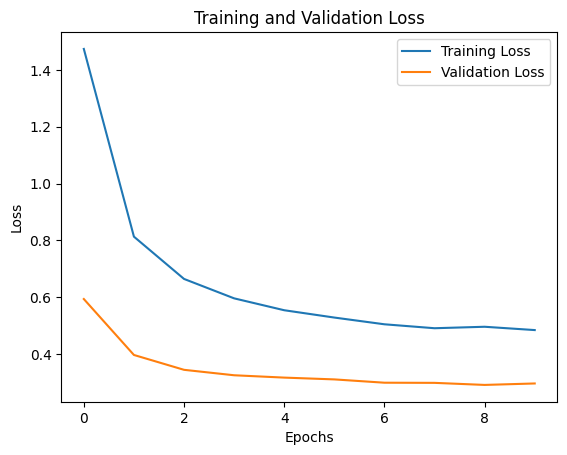

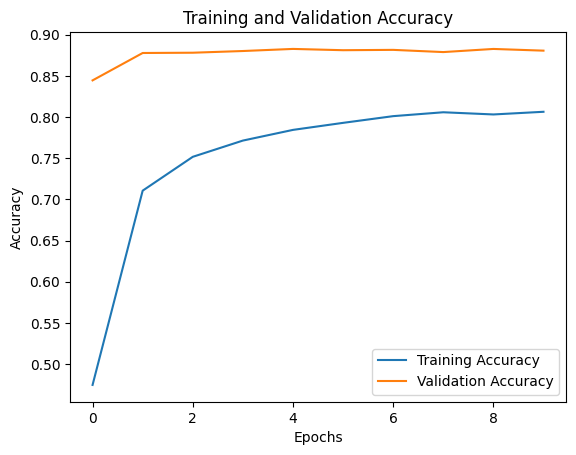

In [ ]:
#Plotting the Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               6300      
                                                                 
 dropout_4 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_8 (Dense)             (None, 8)                 1208      
                                                                 
Total params: 30,158
Trainable params: 30,158
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('41nn_time_range2')